# Music Recommendation System

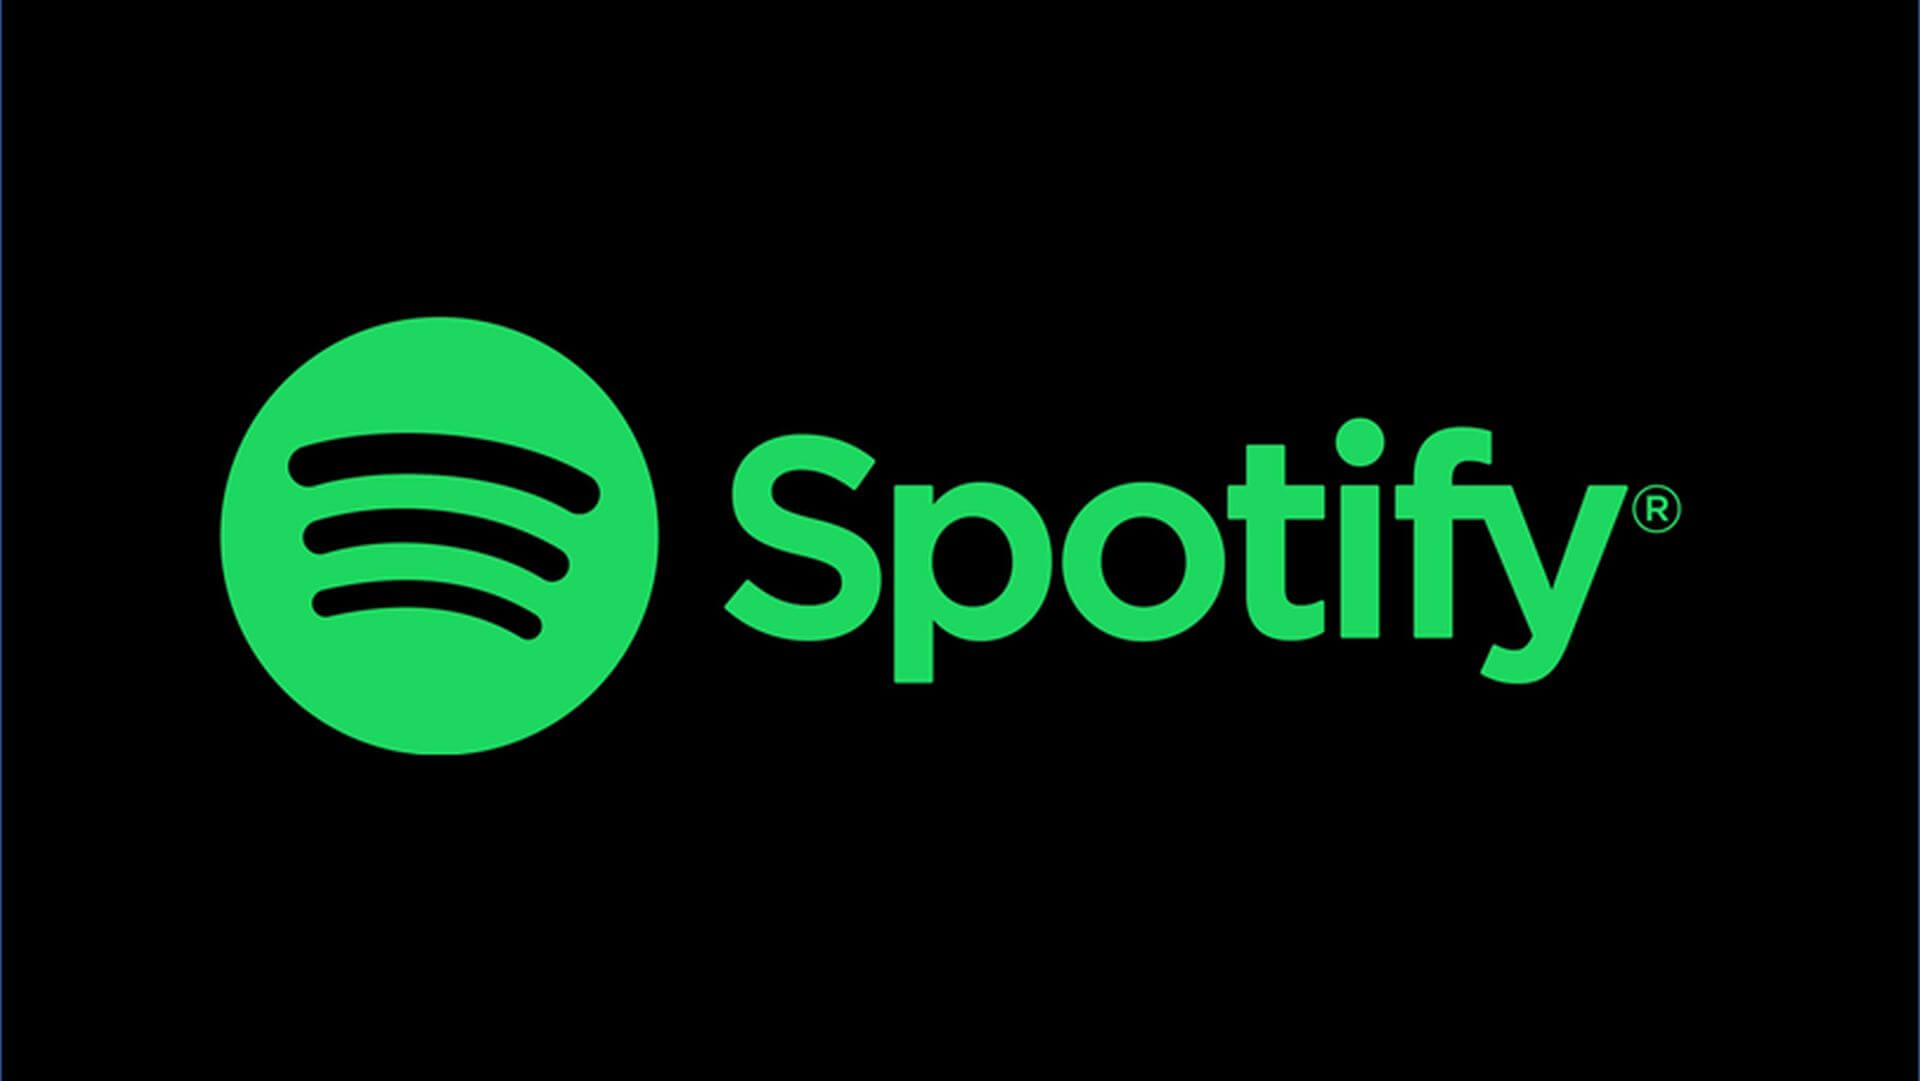

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("music_dataset.csv", index_col = "Unnamed: 0")

In [3]:
df.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Darkside,"Alan Walker, Au/Ra, Tomine Harket",Different World,3nzuGtN3nXARvvecier4K0,6SRWhUJcD2YKahCwHavz3X,74,2018-12-14,211680,False,https://open.spotify.com/track/6SRWhUJcD2YKahC...,0.430,0.606,4,-5.115,0,0.0431,0.1310,0.0,0.1730,0.123,169.988
1,Stranger Things (feat. OneRepublic),"Kygo, OneRepublic",Kids in Love,47oyrKaeobswT4T8zyaxdM,4sJqSKPc5fZ5OZ8JiVI44N,59,2017-11-03,221440,False,https://open.spotify.com/track/4sJqSKPc5fZ5OZ8...,0.604,0.661,0,-5.914,1,0.0375,0.2340,0.0,0.0951,0.506,107.016
2,Shallow,"Lady Gaga, Bradley Cooper",A Star Is Born Soundtrack,4sLtOBOzn4s3GDUv3c5oJD,2VxeLyX666F8uXCJ0dZF8B,84,2018-10-05,215733,False,https://open.spotify.com/track/2VxeLyX666F8uXC...,0.572,0.385,7,-6.362,1,0.0308,0.3710,0.0,0.2310,0.323,95.799
3,Happier,"Marshmello, Bastille",Happier,78EicdHZr5XBWD7llEZ1Jh,2dpaYNEQHiRxtZbfNsse99,77,2018-08-17,214290,False,https://open.spotify.com/track/2dpaYNEQHiRxtZb...,0.687,0.792,5,-2.749,1,0.0452,0.1910,0.0,0.1670,0.671,100.015
4,Into You,"Matisse & Sadko, Hanne Mjøen",Into You,25zpnw9BaDhdjURrYD9dkh,2PhlrsYp7TSkK96ngbmL38,62,2017-12-08,161538,False,https://open.spotify.com/track/2PhlrsYp7TSkK96...,0.553,0.687,8,-6.400,1,0.0340,0.0336,0.0,0.1250,0.278,156.000


In [4]:
df.tail()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
43,Dhundhala,"Yashraj, Dropped Out, Talwiinder",Dhundhala,1wQyuIiZpM5Qy4wQOU2i1J,6PSGzXHJaQogb2G8m8gGZZ,75,2022-02-18,182400,False,https://open.spotify.com/track/6PSGzXHJaQogb2G...,0.648,0.450,5,-9.570,0,0.1670,0.1340,0.000073,0.1370,0.472,99.932
45,Guli Mata,"Saad Lamjarred, Shreya Ghoshal, Rajat Nagpal",Guli Mata,1EK8G52QTTI7LgDKnrCmB6,3B9CL5t32mM2SDdps2IhYM,78,2023-07-12,235575,False,https://open.spotify.com/track/3B9CL5t32mM2SDd...,0.589,0.749,8,-6.115,0,0.0660,0.5010,0.000002,0.3430,0.604,151.522
46,Excuses,"AP Dhillon, Gurinder Gill, Intense",Excuses,3GkXRRRkV3rfgwG1wJset9,29m79w9xPMH4YCD6r8JSmV,79,2020-07-24,176233,False,https://open.spotify.com/track/29m79w9xPMH4YCD...,0.837,0.717,5,-7.749,0,0.0822,0.0842,0.000000,0.1490,0.494,94.984
48,White Brown Black,"Avvy Sra, Karan Aujla, Jaani",White Brown Black,3rOSq53b9Cv7ygKe5NwKNJ,3nKQrVVlwbAQSnFbgZWdN0,78,2022-12-09,176000,False,https://open.spotify.com/track/3nKQrVVlwbAQSnF...,0.868,0.748,1,-3.492,0,0.0951,0.2900,0.000004,0.2520,0.829,119.965
49,"Neela Nilave (From ""RDX"")","Kapil Kapilan, Sam C.S., Manu Manjith","Neela Nilave (From ""Rdx"")",5LXBbKAhhMqgj3rGOBWOah,73rMD23ocpYxwQXJQJyRDv,55,2023-08-25,253000,False,https://open.spotify.com/track/73rMD23ocpYxwQX...,0.765,0.505,11,-6.698,0,0.0345,0.1470,0.000000,0.0988,0.526,119.957


In [5]:
df.shape

(313, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 0 to 49
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        302 non-null    object 
 1   Artists           303 non-null    object 
 2   Album Name        302 non-null    object 
 3   Album ID          313 non-null    object 
 4   Track ID          313 non-null    object 
 5   Popularity        313 non-null    int64  
 6   Release Date      313 non-null    object 
 7   Duration (ms)     313 non-null    int64  
 8   Explicit          313 non-null    bool   
 9   External URLs     313 non-null    object 
 10  Danceability      313 non-null    float64
 11  Energy            313 non-null    float64
 12  Key               313 non-null    int64  
 13  Loudness          313 non-null    float64
 14  Mode              313 non-null    int64  
 15  Speechiness       313 non-null    float64
 16  Acousticness      313 non-null    float64
 17  Ins

In [7]:
print(df.isnull().sum())

Track Name          11
Artists             10
Album Name          11
Album ID             0
Track ID             0
Popularity           0
Release Date         0
Duration (ms)        0
Explicit             0
External URLs        0
Danceability         0
Energy               0
Key                  0
Loudness             0
Mode                 0
Speechiness          0
Acousticness         0
Instrumentalness     0
Liveness             0
Valence              0
Tempo                0
dtype: int64


#### There are few missing values

## Dropping missing values

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 49
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        302 non-null    object 
 1   Artists           302 non-null    object 
 2   Album Name        302 non-null    object 
 3   Album ID          302 non-null    object 
 4   Track ID          302 non-null    object 
 5   Popularity        302 non-null    int64  
 6   Release Date      302 non-null    object 
 7   Duration (ms)     302 non-null    int64  
 8   Explicit          302 non-null    bool   
 9   External URLs     302 non-null    object 
 10  Danceability      302 non-null    float64
 11  Energy            302 non-null    float64
 12  Key               302 non-null    int64  
 13  Loudness          302 non-null    float64
 14  Mode              302 non-null    int64  
 15  Speechiness       302 non-null    float64
 16  Acousticness      302 non-null    float64
 17  Ins

## Creating weights for songs.
#### Songs which are latest should be recommened to users.

In [12]:
# Function to calculate weighted popularity scores based on release date
def calculate_weighted_popularity(release_date):
    # Convert the release date to datetime object
    release_date = datetime.strptime(release_date, '%Y-%m-%d')

    # Calculate the time span between release date and today's date
    time_span = datetime.now() - release_date

    # Calculate the weighted popularity score based on time span (e.g., more recent releases have higher weight)
    weight = 1 / (time_span.days + 1) # adding 1 to ensure no zero division error
    return weight

## Scaling

In [13]:
scaler = MinMaxScaler()
music_features = df[['Danceability', 'Energy', 'Key', 
                           'Loudness', 'Mode', 'Speechiness', 'Acousticness',
                           'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].values
music_features_scaled = scaler.fit_transform(music_features)

### Content based recommendation

In [14]:
# a function to get content-based recommendations based on music features
def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get the index of the input song in the music DataFrame
    input_song_index = df[df['Track Name'] == input_song_name].index[0]

    # Calculate the similarity scores based on music features (cosine similarity)
    similarity_scores = cosine_similarity([music_features_scaled[input_song_index]], music_features_scaled)

    # Get the indices of the most similar songs
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    # Get the names of the most similar songs based on content-based filtering
    content_based_recommendations = df.iloc[similar_song_indices][['Track Name', 'Artists', 'Album Name', 'Release Date', 'Popularity']]

    return content_based_recommendations

## Hybrid Recommendation System
A hybrid recommendation system combines multiple recommendation techniques to provide more accurate and diverse recommendations to users. It uses the strengths of different approaches, such as collaborative filtering and content-based filtering, to overcome their limitations and improve the recommendation process.

In [15]:
# a function to get hybrid recommendations based on weighted popularity
def hybrid_recommendations(input_song_name, num_recommendations=5, alpha=0.5):
    if input_song_name not in df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get content-based recommendations
    content_based_rec = content_based_recommendations(input_song_name, num_recommendations)

    # Get the popularity score of the input song
    popularity_score = df.loc[df['Track Name'] == input_song_name, 'Popularity'].values[0]

    # Calculate the weighted popularity score
    weighted_popularity_score = popularity_score * calculate_weighted_popularity(df.loc[df['Track Name'] == input_song_name, 'Release Date'].values[0])

    # Combine content-based and popularity-based recommendations based on weighted popularity
    hybrid_recommendations = content_based_rec
    recommendation_data = {
    'Track Name': [input_song_name],
    'Artists': [df.loc[df['Track Name'] == input_song_name, 'Artists'].values[0]],
    'Album Name': [df.loc[df['Track Name'] == input_song_name, 'Album Name'].values[0]],
    'Release Date': [df.loc[df['Track Name'] == input_song_name, 'Release Date'].values[0]],
    'Popularity': [weighted_popularity_score]
    }
    recommendations = pd.DataFrame(recommendation_data)
    hybrid_recommendations = pd.concat([hybrid_recommendations, recommendations])

    # Sort the hybrid recommendations based on weighted popularity score
    hybrid_recommendations = hybrid_recommendations.sort_values(by='Popularity', ascending=False)

    # Remove the input song from the recommendations
    hybrid_recommendations = hybrid_recommendations[hybrid_recommendations['Track Name'] != input_song_name]


    return hybrid_recommendations

## Testing recommendation system

In [16]:
input_song_name = "Centuries"
recommendations = hybrid_recommendations(input_song_name, num_recommendations=5)
print(f"Hybrid recommended songs for '{input_song_name}':")
recommendations

Hybrid recommended songs for 'Centuries':


,Track Name,Artists,Album Name,Release Date,Popularity
17,As It Was,Harry Styles,Harry's House,2022-05-20,93.0
37,MI EX TENÍA RAZÓN,KAROL G,MAÑANA SERÁ BONITO (BICHOTA SEASON),2023-08-10,88.0
0,Darkside,"Alan Walker, Au/Ra, Tomine Harket",Different World,2018-12-14,74.0
76,"Chale Aana (From ""De De Pyaar De"")","Amaal Mallik, Armaan Malik, Kunaal Vermaa","Chale Aana (From ""De De Pyaar De"")",2019-05-02,68.0
18,"Mann Mera (From ""Table No. 21"")",Gajendra Verma,Table No. 21,2012-12-19,0.0


## Conclusion
#### 1. Created a Music Recommendation system using spotify
#### 2. There is further scope of improvement by collecting more songs data.

## Expanding Recommendation system with additional songs.

In [17]:
df_artists = pd.read_csv("artist_music.csv", index_col = "Unnamed: 0")

In [18]:
df_artists.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Stereo Hearts (feat. Adam Levine),"Gym Class Heroes, Adam Levine",The Papercut Chronicles II,2mumCpGmuE9iDeOvMx6XrB,0qOnSQQF0yzuPWsXrQ9paz,83,2011-11-11,210960,False,https://open.spotify.com/track/0qOnSQQF0yzuPWs...,0.646,0.795,9,-3.293,1,0.0976,0.0319,0.0,0.2670,0.796,89.990
1,Locked Away (feat. Adam Levine),"R. City, Adam Levine",What Dreams Are Made Of,4AUTMNSP56xicSznzKgzjB,7x5xYW5W42OGPAdHUyyguy,79,2015-10-09,227480,False,https://open.spotify.com/track/7x5xYW5W42OGPAd...,0.509,0.671,1,-5.709,1,0.0678,0.3040,0.0,0.0452,0.550,118.413
2,Bang Bang,"K'NAAN, Adam Levine",Troubadour,4KJCTmDLyr3AYJAN8dBaKo,61YzdCCBPM5Pc7lIiD5i8C,71,2009,186533,True,https://open.spotify.com/track/61YzdCCBPM5Pc7l...,0.623,0.901,10,-4.402,0,0.1820,0.0785,0.0,0.0251,0.896,179.985
3,Lifestyle (feat. Adam Levine),"Jason Derulo, Adam Levine, Maroon 5",Lifestyle (feat. Adam Levine),0SNj1uja6FAoffAMOTdlLy,0osvOdeD3YXZiWkT8MKolJ,67,2021-01-21,153865,True,https://open.spotify.com/track/0osvOdeD3YXZiWk...,0.749,0.674,10,-5.128,0,0.0366,0.0209,0.0,0.1690,0.711,123.055
4,Ojalá,"The Rudeboyz, Maluma, Adam Levine",Ojalá,00XhrF5bpFfMJ0tT85DkTY,4dLIAE3xbJLoiIBbKkZWJk,65,2022-10-20,189080,False,https://open.spotify.com/track/4dLIAE3xbJLoiIB...,0.765,0.624,7,-4.932,1,0.0929,0.3250,0.0,0.1040,0.277,92.984


In [19]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1644 entries, 0 to 31
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        1644 non-null   object 
 1   Artists           1644 non-null   object 
 2   Album Name        1644 non-null   object 
 3   Album ID          1644 non-null   object 
 4   Track ID          1644 non-null   object 
 5   Popularity        1644 non-null   int64  
 6   Release Date      1644 non-null   object 
 7   Duration (ms)     1644 non-null   int64  
 8   Explicit          1644 non-null   bool   
 9   External URLs     1644 non-null   object 
 10  Danceability      1644 non-null   float64
 11  Energy            1644 non-null   float64
 12  Key               1644 non-null   int64  
 13  Loudness          1644 non-null   float64
 14  Mode              1644 non-null   int64  
 15  Speechiness       1644 non-null   float64
 16  Acousticness      1644 non-null   float64
 17  In

In [20]:
print(df_artists.isnull().sum())

Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64


In [21]:
df = pd.concat([df, df_artists])

In [22]:
scaler = MinMaxScaler()
music_features = df[['Danceability', 'Energy', 'Key', 
                           'Loudness', 'Mode', 'Speechiness', 'Acousticness',
                           'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].values
music_features_scaled = scaler.fit_transform(music_features)

In [23]:
input_song_name = "Lover"
recommendations = hybrid_recommendations(input_song_name, num_recommendations=5)
print(f"Hybrid recommended songs for '{input_song_name}':")
recommendations

Hybrid recommended songs for 'Lover':


,Track Name,Artists,Album Name,Release Date,Popularity
13,Starboy,"The Weeknd, Daft Punk",Starboy,2016-11-25,92.0
23,Starboy,"The Weeknd, Daft Punk",Starboy,2016-11-25,92.0
44,bad guy,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,83.0
30,Because I Had You,Shawn Mendes,Shawn Mendes,2018-05-25,58.0
70,Happy,AREA21,Happy,2018-02-09,38.0
